# Sarvesh Vikas Tikekar (2022120037)


*   CSL701: Machine Learning (Academic Year: 2025- 2026)
*   Experiment no: 5: **Implementation of Support Vector Machine (SVM)**



In [1]:
# Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CSL701-Machine-Learning/

/content/drive/MyDrive/CSL701-Machine-Learning


In [3]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Declaring all the important objects

le = LabelEncoder()
svm = SVC(kernel='linear', C=0.1)

# **Dataset Details**

Dataset Link: [Breast Cancer Wisconsin Dataset (Kaggle) ](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


---


The Breast Cancer Wisconsin (Diagnostic) Dataset is one of the most widely used and recognizable benchmarks in machine learning, particularly for binary classification problems. Originating from the University of Wisconsin Hospital, its core objective is to predict whether a tumor mass is malignant (cancerous) or benign (non-cancerous) based on features extracted from cell imagery. Its universal familiarity and clean structure make it a common starting point for students and researchers testing new classification algorithms.

The dataset is notable for its feature richness, containing 30 real-valued attributes calculated from digitized images of a Fine Needle Aspirate (FNA) of a breast mass. These features quantify crucial characteristics of the cell nuclei, such as the mean radius, texture, perimeter, area, and concavity of the mass. Since each of these ten core characteristics is measured by its mean, standard error, and "worst" (largest) value across the sample, the resulting data is highly descriptive and exists in a 30-dimensional feature space.

This dataset is particularly suitable for Support Vector Machines (SVMs) because the classes are known to be highly separable. The SVM excels at this kind of task by precisely identifying the optimal maximum margin hyperplane in that 30-dimensional space. Successfully training an SVM on this dataset, often using a well-tuned Radial Basis Function (RBF) kernel, provides strong evidence of the model's predictive power and ability to solve critical, non-linear problems with near-perfect accuracy.

In [5]:
# Using the dataset now

breast_cancer_data = pd.read_csv('Datasets/BreastCancerWisconsin.csv')
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
# Printing the first 5 rows of the dataset and dropping the Unnamed: 32 column

breast_cancer_data.drop(columns=['Unnamed: 32'], inplace=True)
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Finding out the columns of the Dataset

breast_cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
# Label Encoding the diagnosis class

breast_cancer_data['diagnosis'] = le.fit_transform(breast_cancer_data['diagnosis'])
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Visualising the dataset**

**Heatmap of features**

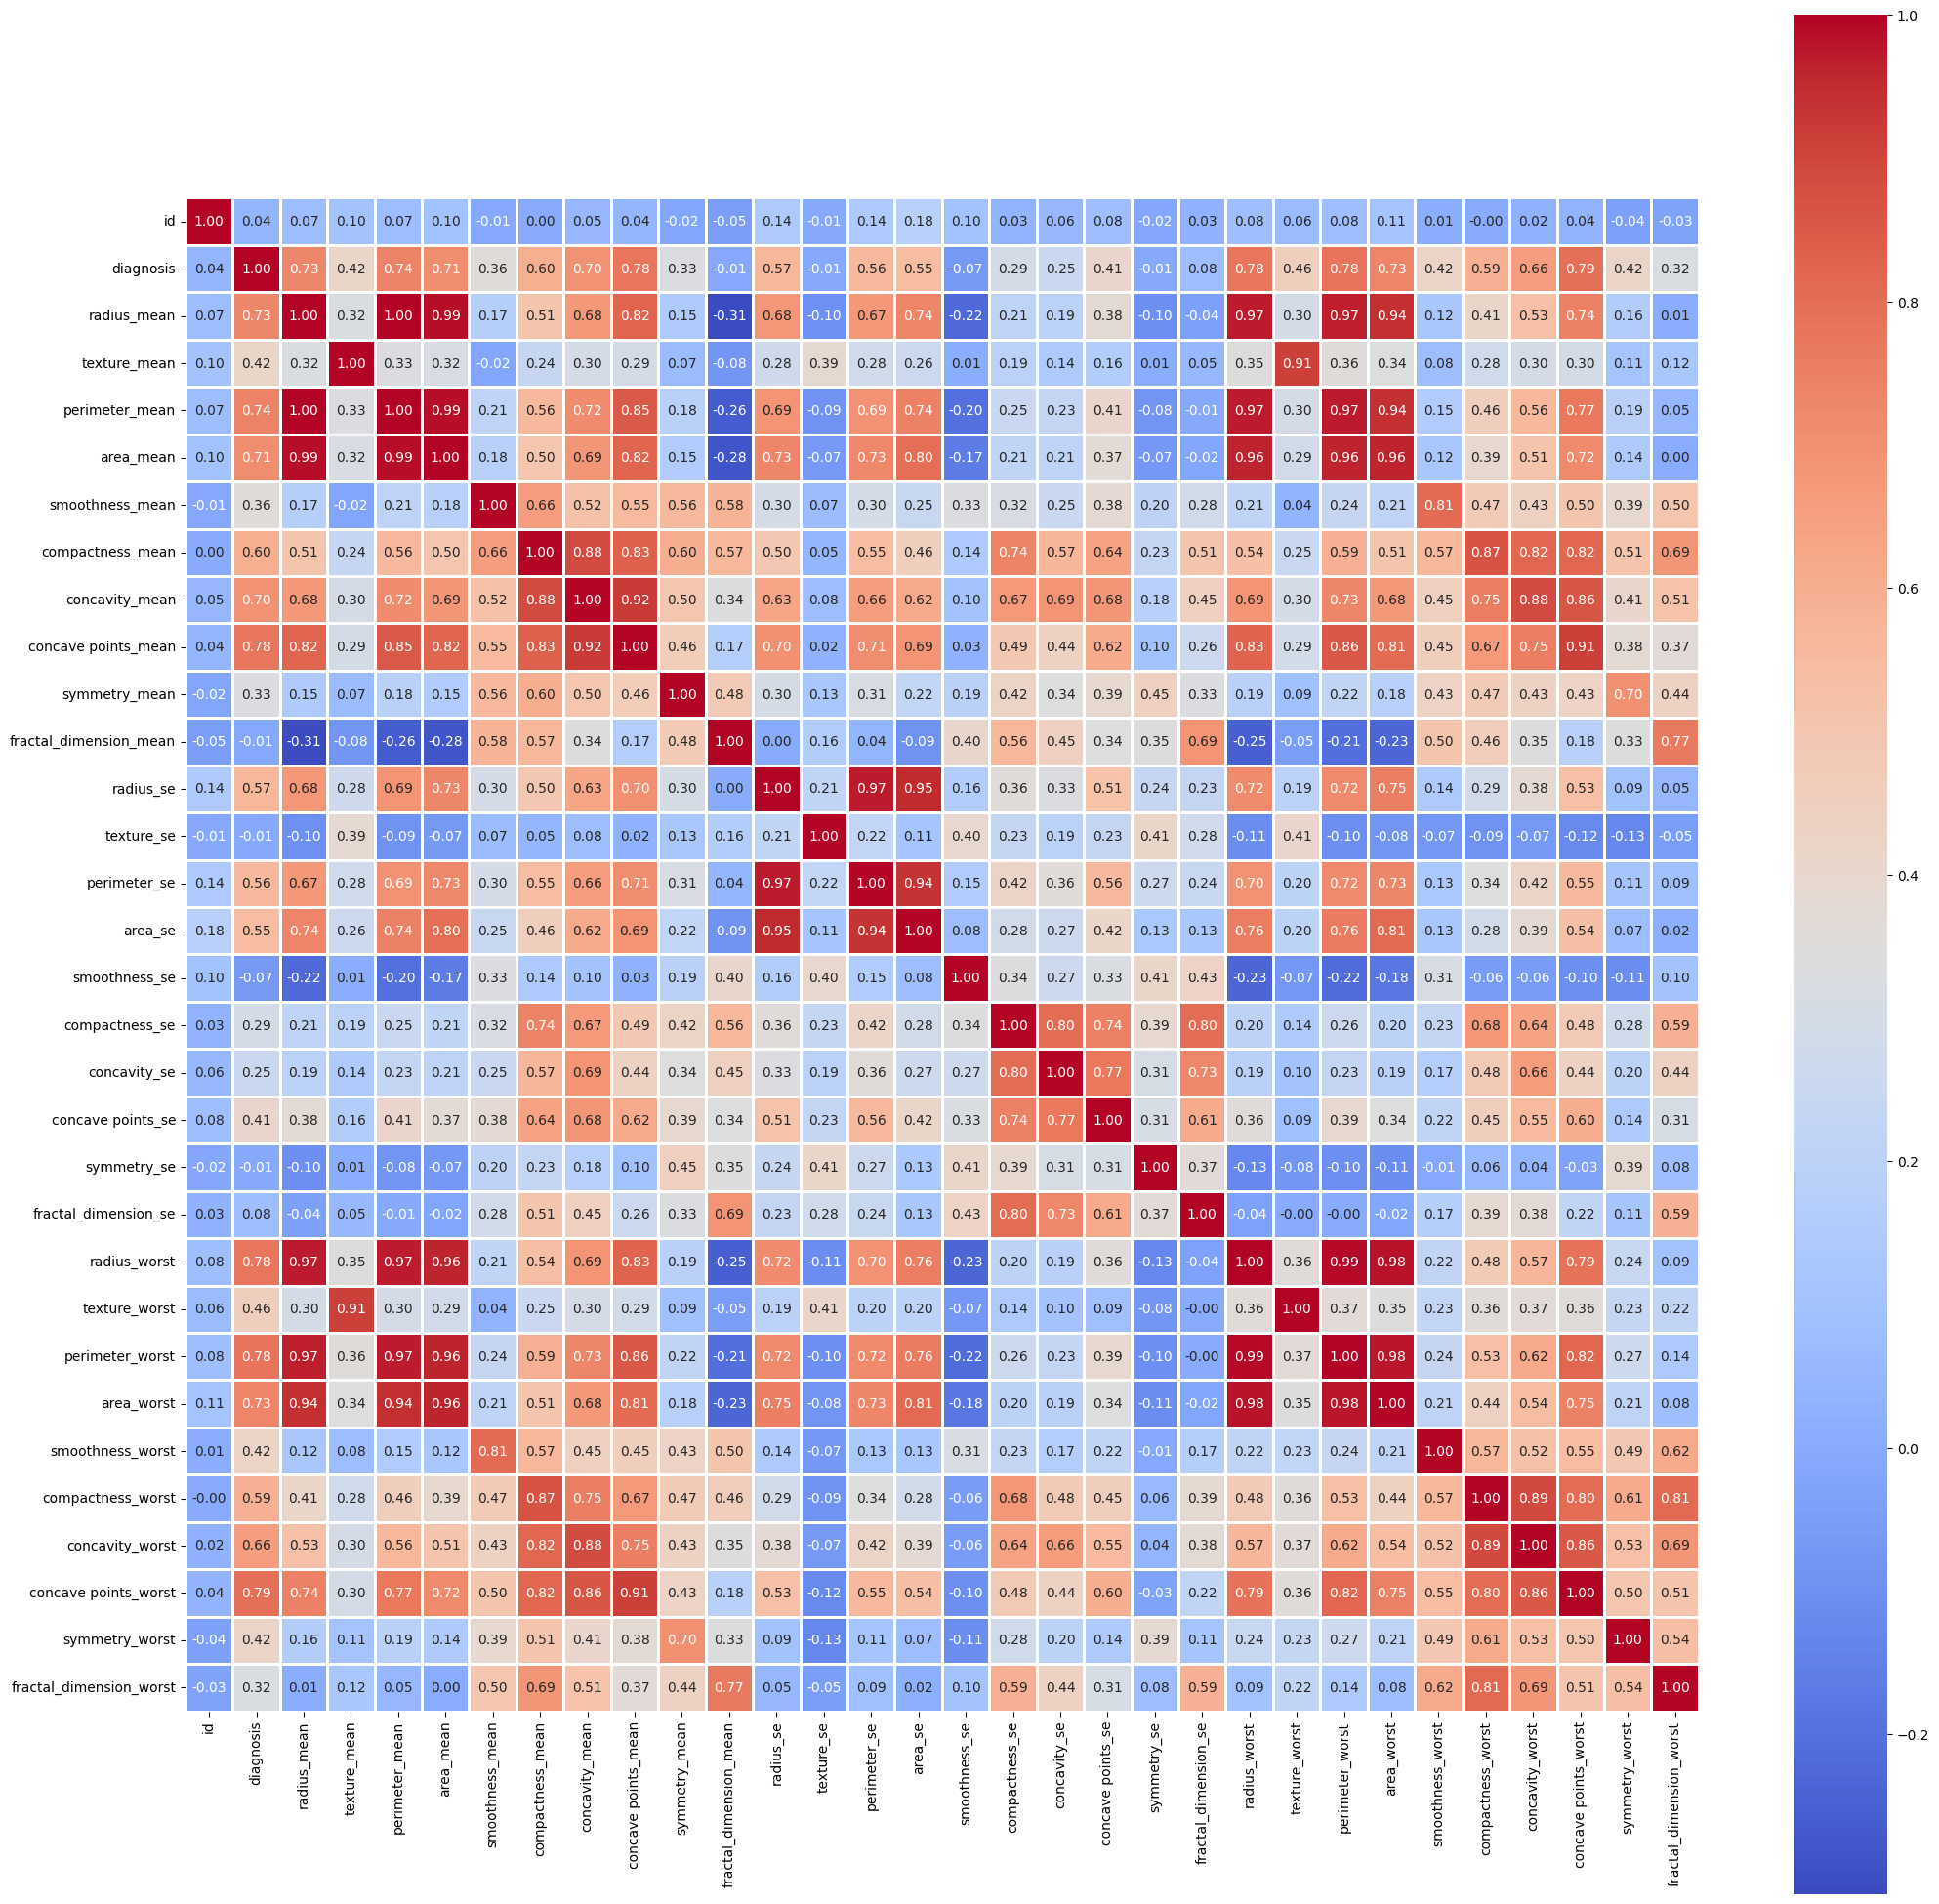

In [9]:
corr = breast_cancer_data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', square=True, fmt='0.2f', linewidths=0.8)
plt.show()

In [10]:
corr = corr.drop(labels=['diagnosis', 'id']).drop(columns=['id']).sort_values(by='diagnosis', ascending=False)
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
concave points_worst,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
perimeter_worst,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_worst,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concavity_worst,0.659610,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,0.433721,...,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511


Here looking at the refined correlation matrix, the 2 most influential features for the diagnosis class are:



1.   concave points_worst	(**Correlation coeff ~ 0.8**)
2.   perimeter_worst (**Correlation coeff ~ 0.78**)


Hence the initial SVM model would be trained on these features

# Support Vector Machine Model-1

Features:

* concave points_worst
* perimeter_worst

In [11]:
bc_data2 = breast_cancer_data[['concave points_worst', 'perimeter_worst', 'diagnosis']]

X = bc_data2.drop(columns=['diagnosis'])
y = bc_data2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [12]:
pred = svm.predict(X_test)
acc = accuracy_score(pred, y_test)

print(f"Accuracy of this model is: {acc * 100}")

Accuracy of this model is: 95.8041958041958


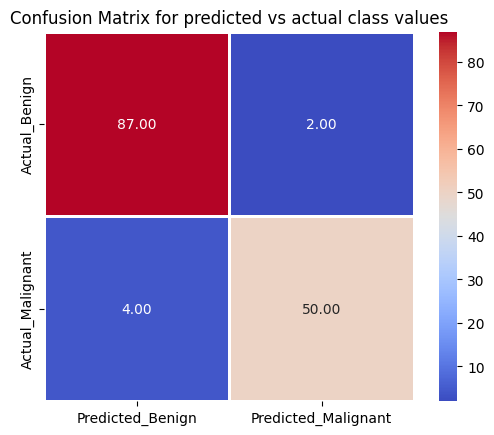

In [13]:
# Confusion matrix

conf = pd.DataFrame(confusion_matrix(y_test, pred), columns=['Predicted_Benign', 'Predicted_Malignant'], index = ['Actual_Benign', 'Actual_Malignant'])
sns.heatmap(data=conf, annot=True, cmap='coolwarm', square=True, fmt='0.2f', linewidths=0.8)
plt.title('Confusion Matrix for predicted vs actual class values')
plt.show()

# Decision Boundary Analysis for SVM Model-1

<Figure size 2000x1500 with 0 Axes>

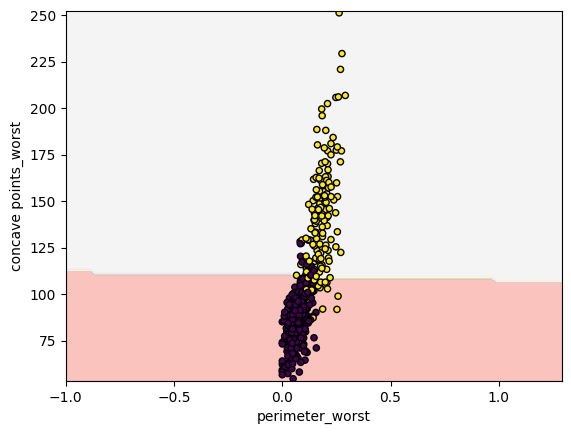

In [14]:
plt.figure(figsize=(20, 15))

DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train,
        response_method="predict",
        alpha=0.8,
        cmap="Pastel1",
        xlabel='perimeter_worst',
        ylabel='concave points_worst'
)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], s=20, edgecolors="k", c=y_train)
plt.show()

# Support Vector Machine Model-2

Features:

* radius_mean
* area_mean

In [15]:
bc_data3 = breast_cancer_data[['radius_mean', 'perimeter_mean', 'diagnosis']]

X = bc_data3.drop(columns=['diagnosis'])
y = bc_data3['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [16]:
pred = svm.predict(X_test)
acc = accuracy_score(pred, y_test)

print(f"Accuracy of this model is: {acc * 100}")

Accuracy of this model is: 93.00699300699301


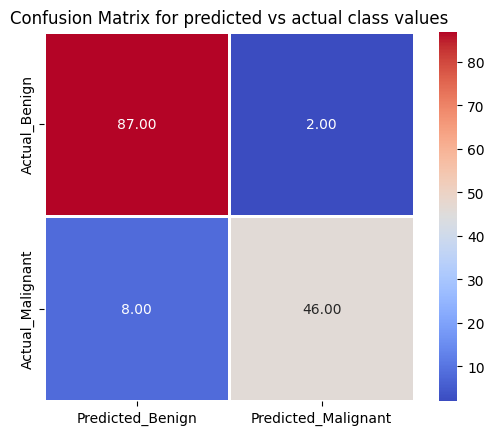

In [17]:
# Confusion matrix

conf = pd.DataFrame(confusion_matrix(y_test, pred), columns=['Predicted_Benign', 'Predicted_Malignant'], index = ['Actual_Benign', 'Actual_Malignant'])
sns.heatmap(data=conf, annot=True, cmap='coolwarm', square=True, fmt='0.2f', linewidths=0.8)
plt.title('Confusion Matrix for predicted vs actual class values')
plt.show()

<Figure size 3000x1500 with 0 Axes>

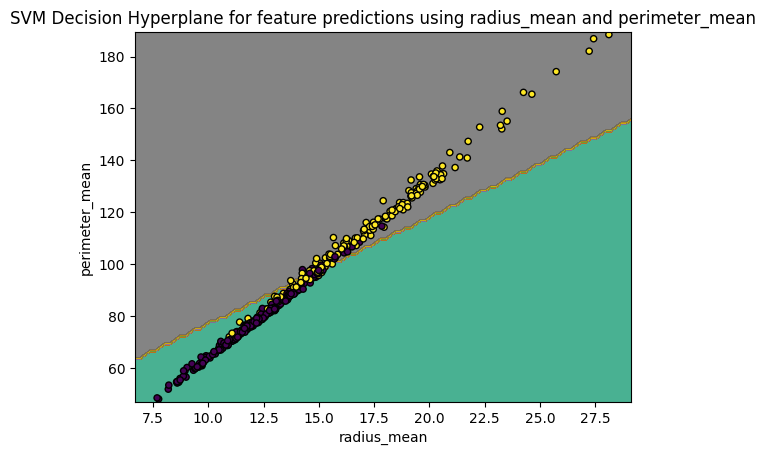

In [18]:
plt.figure(figsize=(30, 15))

DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train,
        response_method="predict",
        alpha=0.8,
        cmap="Dark2",
        xlabel='radius_mean',
        ylabel='perimeter_mean'
)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], s=20, edgecolors="k", c=y_train)
plt.title(f'SVM Decision Hyperplane for feature predictions using radius_mean and perimeter_mean')
plt.show()

# Model 3: Complex SVM model with Hyperparameter Tuning



* Hyperparameter Tuning using Sklearn GridSearchCV
* Kernels to be used: RBF, Sigmoid and polynomial
* Regularization scores: 0.1, 1, 10, 100, 1000


In [19]:
params = {'kernel': ['rbf', 'sigmoid', 'poly'],
          'C': [0.1, 1, 10, 100, 1000],
}

complex_svc = SVC()
grid_search = GridSearchCV(estimator=complex_svc, param_grid=params, cv=5, refit=True)

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
pred = best_svm.predict(X_test)
acc = accuracy_score(pred, y_test)

print(f"Accuracy of this model is: {acc * 100}")

Accuracy of this model is: 90.9090909090909


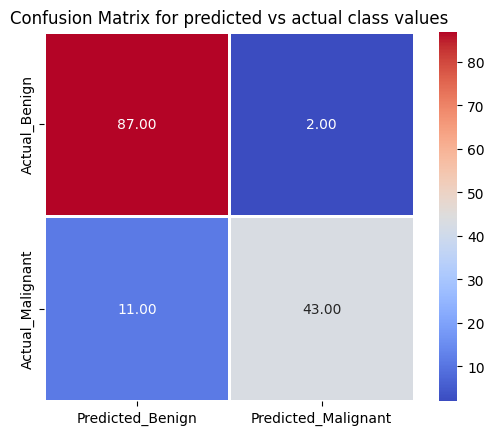

In [20]:
# Confusion matrix

conf = pd.DataFrame(confusion_matrix(y_test, pred), columns=['Predicted_Benign', 'Predicted_Malignant'], index = ['Actual_Benign', 'Actual_Malignant'])
sns.heatmap(data=conf, annot=True, cmap='coolwarm', square=True, fmt='0.2f', linewidths=0.8)
plt.title('Confusion Matrix for predicted vs actual class values')
plt.show()

<Figure size 3000x1500 with 0 Axes>

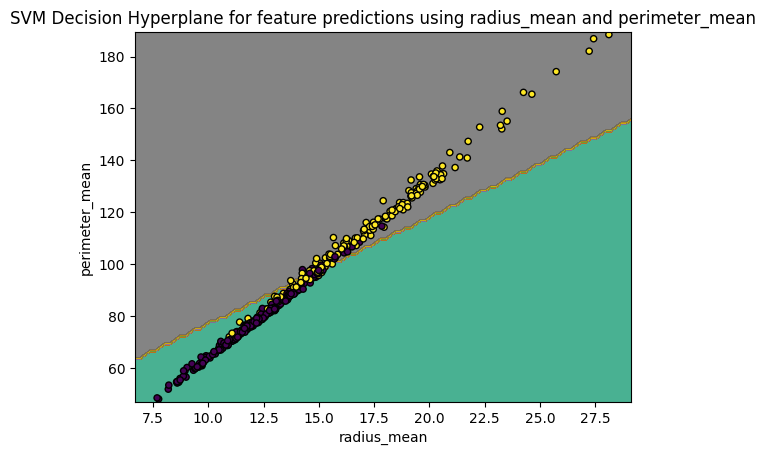

In [21]:
plt.figure(figsize=(30, 15))

DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train,
        response_method="predict",
        alpha=0.8,
        cmap="Dark2",
        xlabel='radius_mean',
        ylabel='perimeter_mean'
)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], s=20, edgecolors="k", c=y_train)
plt.title(f'SVM Decision Hyperplane for feature predictions using radius_mean and perimeter_mean')
plt.show()